In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [2]:
import os

# F2

In [3]:
input_folder_f2 = "../../stripes_AIL_gg6a/F2/stripes_data/with.fam.f2.call2.TIGER_OUT/"

In [4]:
#c = os.listdir(input_folder)
#d = [i for i in a if i.endswith(".1.corrected.refined.breaks.txt")]

In [5]:
chr_1_breaks_f2 = []
for i in os.listdir(input_folder_f2):
    #print("sample", i)
    c = os.listdir(os.path.join(input_folder_f2,i))
    for j in c : 
        if j.endswith(".1.corrected.refined.breaks.txt"):
            #print("found one!")
            #print(j)
            chr_1_breaks_f2.append(os.path.join(input_folder_f2, i,j))

In [6]:
len(chr_1_breaks_f2)

930

In [7]:
print(chr_1_breaks_f2[0])

../../stripes_AIL_gg6a/F2/stripes_data/with.fam.f2.call2.TIGER_OUT/56502.genotype/56502.genotype.1.corrected.refined.breaks.txt


In [8]:
dfs_f2 = []
for i in chr_1_breaks_f2:
    dfs_f2.append(pd.read_csv(i, sep="\t", header=None))

In [9]:
all_df_f2 = pd.concat(dfs_f2)

In [10]:
all_df_f2.columns = ["genotype", "chr", "start", "stop", "type"]

In [11]:
all_df_f2.genotype = [i.rstrip(".genotype") for i in all_df_f2.genotype]

# F15

In [12]:
input_folder = "../../stripes_AIL_gg6a/F15/stripes_data/with.fam.f2.call2.TIGER_OUT/"

In [13]:
a = os.listdir(input_folder)
b = [i for i in a if i.endswith(".1.corrected.refined.breaks.txt")]

In [14]:
chr_1_breaks = []
for i in os.listdir(input_folder):
    #print("sample", i)
    a = os.listdir(os.path.join(input_folder,i))
    for j in a : 
        if j.endswith(".1.corrected.refined.breaks.txt"):
            #print("found one!")
            #print(j)
            chr_1_breaks.append(os.path.join(input_folder, i,j))

In [15]:
len(chr_1_breaks)

807

In [16]:
print(chr_1_breaks[0])

../../stripes_AIL_gg6a/F15/stripes_data/with.fam.f2.call2.TIGER_OUT/313015.genotype/313015.genotype.1.corrected.refined.breaks.txt


In [17]:

dfs = []
for i in chr_1_breaks:
    current_df = pd.read_csv(i, sep="\t", header=None)
    current_df.columns = ["genotype", "chr", "start", "stop", "type"]
    current_df = current_df.sort_values(ascending=True,by="start" )
    means = []
    length_of_break = []
    end = 0
    for i, k in current_df.iterrows():
        mean = np.mean([end,k["start"]])
        means.append(mean)
        length = k["start"] - end
        length_of_break.append(length)
        end = k["stop"]
    
    current_df["mean"]=means
    current_df["len_break"] = length_of_break
    dfs.append(current_df)

In [18]:
#pd.read_csv(chr_1_breaks[0], sep="\t", header=None)

In [19]:
all_df = pd.concat(dfs)

In [20]:
all_df

,genotype,chr,start,stop,type,mean,len_break
0,313015.genotype,1,1,99350,LL,0.5,1
1,313015.genotype,1,511541,511541,CL,305445.5,412191
2,313015.genotype,1,512481,22946065,CC,512011.0,940
3,313015.genotype,1,22946376,23079793,CL,22946220.5,311
4,313015.genotype,1,45752569,53195463,LL,34416181.0,22672776
...,...,...,...,...,...,...,...
0,245815.genotype,1,1,146906685,LL,0.5,1
1,245815.genotype,1,170702887,197608386,CC,158804786.0,23796202
0,244415.genotype,1,1,197608386,CU,0.5,1
0,244915.genotype,1,1,197608386,LU,0.5,1


In [21]:
all_df.columns = ["genotype", "chr", "start", "stop", "type", "mean", "len_break"]

In [22]:
all_df.genotype = [i.rstrip(".genotype") for i in all_df.genotype]

In [23]:
all_df

,genotype,chr,start,stop,type,mean,len_break
0,313015,1,1,99350,LL,0.5,1
1,313015,1,511541,511541,CL,305445.5,412191
2,313015,1,512481,22946065,CC,512011.0,940
3,313015,1,22946376,23079793,CL,22946220.5,311
4,313015,1,45752569,53195463,LL,34416181.0,22672776
...,...,...,...,...,...,...,...
0,245815,1,1,146906685,LL,0.5,1
1,245815,1,170702887,197608386,CC,158804786.0,23796202
0,244415,1,1,197608386,CU,0.5,1
0,244915,1,1,197608386,LU,0.5,1


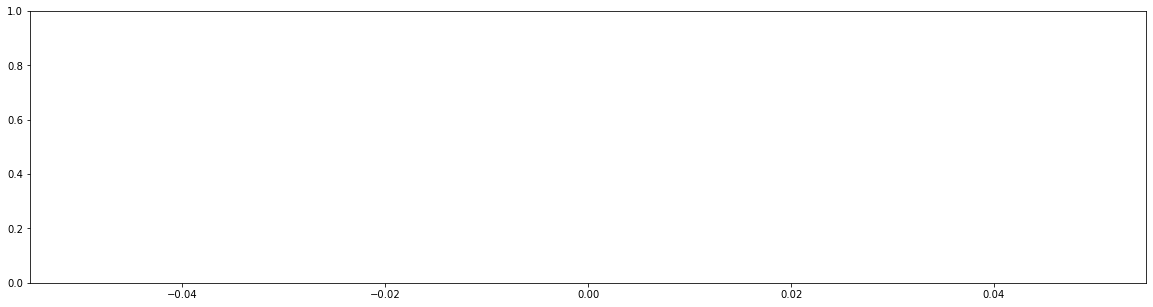

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
sns.rugplot(all_df["start"], ax=ax, alpha=0.005)
#ax.set_xlim(164800000,168700000)
plt.show()

In [25]:
window = all_df.loc[(all_df["start"]>164800000) & (all_df["start"]<168700000)]

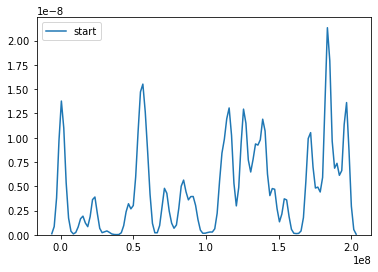

In [26]:
sns.kdeplot(all_df["start"],bw=2000000)
plt.show()

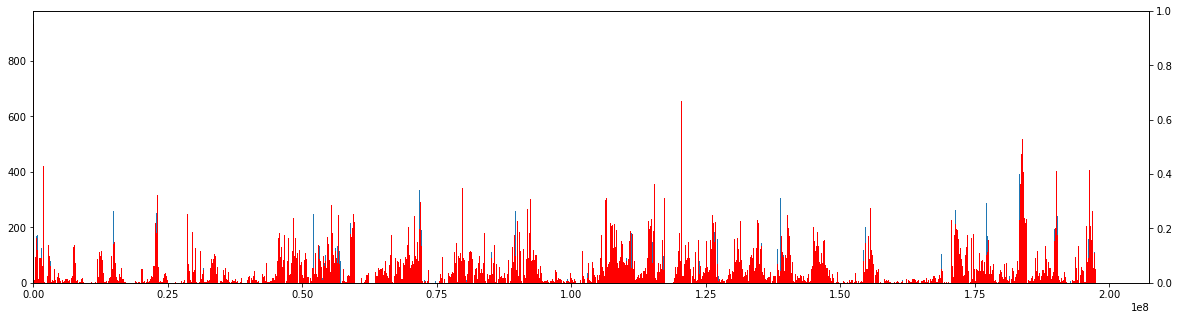

In [27]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.hist(all_df["start"], bins=2000)
ax.hist(all_df_f2["start"], bins=2000, color="Red")

ax2=ax.twinx()
#sns.kdeplot(all_df["start"], ax=ax2,bw=1000000, color="Blue", alpha=0.3, shade=True)
#sns.kdeplot(all_df_f2["start"], ax=ax2,bw=1000000, color="Red", alpha=0.3, shade=True)
ax.set_xlim(0,)
#ax2.set_xlim(164800000,168700000)

#ax.set_ylim(0,800)
#ax2.set_ylim(0,0.5*1e-8)


plt.show()

In [28]:
window_f2 = all_df_f2.loc[(all_df_f2["start"]>164800000) & (all_df_f2["start"]<168700000)]

In [29]:
window = all_df.loc[(all_df["start"]>164800000) & (all_df["start"]<168700000)]

In [30]:
len(all_df)

28885

In [31]:
len(all_df_f2)

106860

# ALL SAMPLES

In [32]:
input_folder_base = "../../stripes_AIL_gg6a/"

In [33]:
gen_folders = [os.path.join(input_folder_base, i,"stripes_data/with.fam.f2.call2.TIGER_OUT/") for i in os.listdir(input_folder_base) if i.startswith("F")]

In [34]:
chr_1_breaks_all = []

for gen in gen_folders:
    for i in os.listdir(gen):
        #print(i)
        #print("sample", i)
        c = os.listdir(os.path.join(gen,i))
        for j in c : 
            if j.endswith(".1.corrected.refined.breaks.txt"):
                #print("found one!")
                #print(j)
                chr_1_breaks_all.append(os.path.join(gen,i,j))

In [35]:
len(chr_1_breaks_all)

3124

In [36]:

dfs_all = []
for i in chr_1_breaks:
    current_df = pd.read_csv(i, sep="\t", header=None)
    current_df.columns = ["genotype", "chr", "start", "stop", "type"]
    current_df = current_df.sort_values(ascending=True,by="start" )
    means = []
    length_of_break = []
    end = 0
    for i, k in current_df.iterrows():
        mean = np.mean([end,k["start"]])
        means.append(mean)
        length = k["start"] - end
        length_of_break.append(length)
        end = k["stop"]
    
    current_df["mean"]=means
    current_df["len_break"] = length_of_break
    dfs_all.append(current_df)

In [37]:
df_big = pd.concat(dfs_all)

In [38]:
len(df_big)

28885

In [39]:
df_big.head(5)

,genotype,chr,start,stop,type,mean,len_break
0,313015.genotype,1,1,99350,LL,0.5,1
1,313015.genotype,1,511541,511541,CL,305445.5,412191
2,313015.genotype,1,512481,22946065,CC,512011.0,940
3,313015.genotype,1,22946376,23079793,CL,22946220.5,311
4,313015.genotype,1,45752569,53195463,LL,34416181.0,22672776


In [40]:
df_big.genotype = [i.rstrip(".genotype") for i in df_big.genotype]

In [41]:
#[i for i in df_big.genotype if i.endswith("15")]

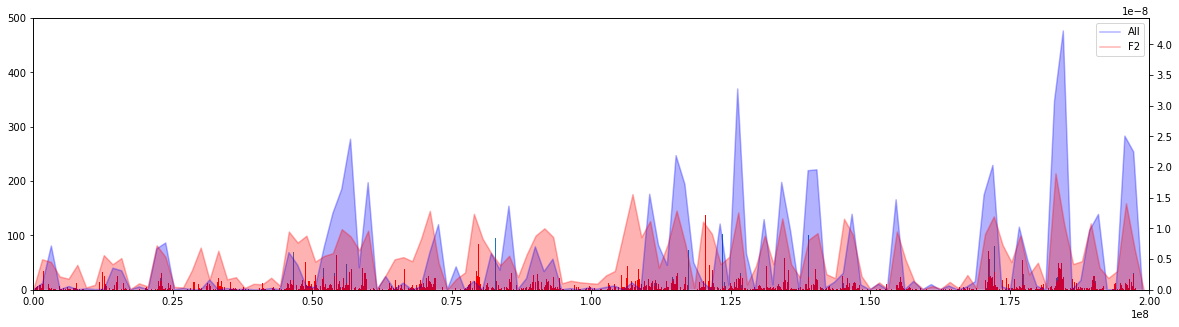

In [42]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.hist(df_big["start"], bins=20000)
ax2 = ax.twinx()
sns.kdeplot(df_big["start"], ax=ax2,bw=500000, color="Blue", alpha=0.3, shade=True, label="All")

ax.hist(all_df_f2["start"], bins=20000, color="Red")
sns.kdeplot(all_df_f2["start"], ax=ax2,bw=500000, color="Red", alpha=0.3, shade=True, label="F2")

ax.set_xlim(0,2*1e8)
ax.set_ylim(0,500)
plt.show()

In [43]:
all_lower = df_big.loc[[i for i,k in df_big.iterrows() if not k["genotype"][-2:] =="02"]]

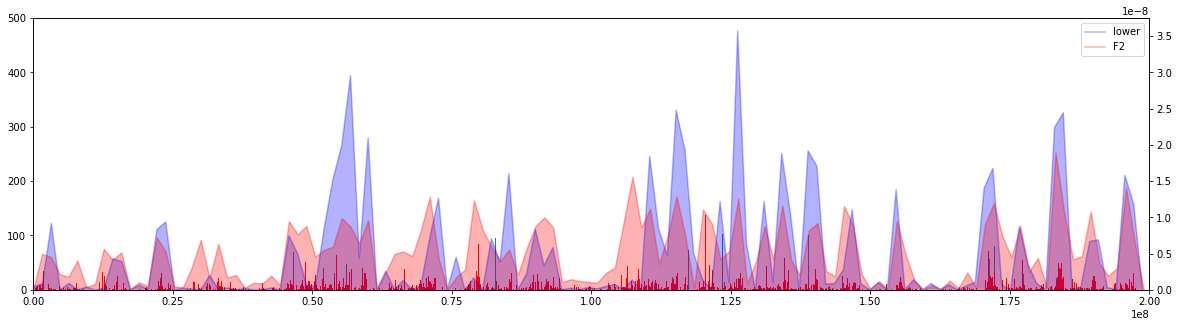

In [44]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.hist(df_big["start"], bins=20000)
ax2 = ax.twinx()
sns.kdeplot(all_lower["start"], ax=ax2,bw=500000, color="Blue", alpha=0.3, shade=True, label="lower")

ax.hist(all_df_f2["start"], bins=20000, color="Red")
sns.kdeplot(all_df_f2["start"], ax=ax2,bw=500000, color="Red", alpha=0.3, shade=True, label="F2")

ax.set_xlim(0,2*1e8)
ax.set_ylim(0,500)
plt.show()

In [45]:
"""
Author: Tilman.Ronneburg@imbim.uu.se
20190711
"""
import pandas as pd
import numpy as np
import os
import copy
import scipy
from operator import itemgetter


class Pedigree(object):
    """ Object for parsing pedigree information.
        Requires pedigree file with tab separated fields for:
        sample_id, sire, dam and sex in that order. """
    def __init__(self,pedigree_file):
        self.pedigree = self.load_pedigree(pedigree_file)


    def load_pedigree(self, pedfile):
        """Returns a dictionary from a input file """
        raw_ped = pd.read_csv(pedfile, sep="\t")
        raw_ped.index=raw_ped["ID"]
        ped_d = {}
        for i, k in raw_ped.iterrows():
            ped_d[str(i)] = {"sire":str(k["Sire"]).split(".")[0],
                        "dam":str(k["Dam"]).split(".")[0],
                        "sex":str(k["Sex"]),
                        "generation":str(i)[-2:]}
        return ped_d


    def _old_load_pedigree(self, pedfile):
        """Returns a dictionary from a input file """
        raw_ped = open(pedfile).read().split("\n")
        ped_d = {}
        for line in raw_ped:
            if not line=="":
                l = line.split("\t")
                ped_d[l[0]]={"sire":str(l[1]),
                             "dam":str(l[2]),
                             "sex":str(l[3]),
                             "generation":str(l[0][-2:]),}
        return ped_d


    def get_parents(self,sample):
        """ Returns dam and sire for the the selected sample."""
        dam, sire = self.pedigree[sample]["dam"],self.pedigree[sample]["sire"]
        return dam,sire


    def get_offspring(self, sample):
        """Returns all offspring for the the selected sample."""
        offspring_list = []
        for key, item in self.pedigree.items():
            if sample in [item["sire"], item["dam"]]:
                offspring_list.append(key)
        return offspring_list


    def get_siblings(self,sample, half=False):#
        """ Returns all siblings for the the selected sample.
            If half=True, halfsibs are also returned."""
        dam, sire = self.get_parents(sample=sample)#
        sibs = []
        for key, item in self.pedigree.items():
            if half==False:
                if dam ==item["dam"] and sire==item["sire"]:
                    sibs.append(key)
            if half==True:
                if dam ==item["dam"] or sire==item["sire"]:
                    sibs.append(key)
        return sibs


    def get_families(self, generation,min_size_threshold=5):
        """ Returns a list of lists, where each list represents all individuals
            in the chosen generation that share both parents,
            if the minimum threshold for family size is reached."""
        families = []
        assigned_individuals = []
        for key, item in self.pedigree.items():
            ## lstrip() to deal with inconsistent 03/3 naming of generations
            if item["generation"].lstrip("0")==str(generation).lstrip("0"):
                sibs = self.get_siblings(sample=key, half=False)
                if not key in assigned_individuals:
                    assigned_individuals= assigned_individuals + sibs
                    if len(sibs)>=min_size_threshold:
                        families.append(sibs)
        return families


    def write_pedigree(self, filename):
        """ Writes the pedigree out to new file. """
        with open(filename, "w") as handle:
            handle.write("ID\tsire\tdam\tsex\n")
            for key, item in self.pedigree.items():
                handle.write("\t".join([key,
                                        item["sire"],
                                        item["dam"],
                                        item["sex"]])+"\n")




class Genotypes(object):
    """ """
    def __init__(self,gt_file,pedigree_file=None):
        """ initialise function """
        self.subset = []
        self.gt_matrix = self._load_genotypes(gt_file)
        self.samples  = list(self.gt_matrix.index.astype(str))
        if pedigree_file:
            self.pedigree = Pedigree(pedigree_file)
        self.filters = []


    def _load_genotypes(self, gt_file):
        """ load new genotypes into Dataframe. """
        #import pandas as pd
        df = pd.read_csv(gt_file)
        df.index = df["Unnamed: 0"].astype(str)
        del(df["Unnamed: 0"])
        return df


    def add_genotypes(self, gt_file):
        """ Add genotypes to the genotype matrix """
        if self.subset:
            print("you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset ")
        new_gt = self._load_genotypes(gt_file)
        self.gt_matrix = pd.concat([self.gt_matrix, new_gt], sort=True)
        #print("length: old")
        #print(len(self.samples))
        self.samples = list(self.gt_matrix.index.astype(str)) # update sample list order
        #print("length: new")
        #print(len(self.samples))
        self.subset.append({"type":"add_genotypes", "filename":gt_file})
        return None


    def subset_gt(self,samples=None,bins=None):
        """ subset the genotype matrix """
        new_gt =self.gt_matrix
        if bins:
            new_gt = new_gt[bins]
        if samples:
            new_gt = new_gt.loc[samples]
        new_instance = copy.deepcopy(self)
        new_instance.gt_matrix = new_gt
        new_instance.samples  = list(new_instance.gt_matrix.index)
        #TODO: same subsetting for other matrices
        new_instance.subset.append({"type":"subset", "samples":samples, "bins":bins})
        return new_instance


    def get_sample(self, sample):
        """ extract a specific sample from the genotype matrix """
        array = self.gt_matrix.loc[sample]
        #TODO return additional information about sample
        return array


    def add_pedigree(self, pedigree_file):
        """ add a pedigree to the class as self.pedigree """
        if self.pedigree:
            print("there is already a pedigree loaded into the Genotype object, replacing it")
        self.pedigree = Pedigree(pedigree_file=pedigree_file)


    def congruent(self, p1, p2, offspring, jitter=0.2):
        """ check if the genotypes of a parent-offspring triplet are congruent for a specific bin """
        ##sanity check:
        if not p1=="NA":
            p1 = float(p1)
            if p1 >1 or p1< -1:
                raise ValueError("genotype probability out of bounds(1,-1) for p1: {}".format(p1))
        if not p2=="NA":
            p2 = float(p2)
            if p2 >1 or p2< -1:
                raise ValueError("genotype probability out of bounds(1,-1) for p2: {}".format(p2))
        if not offspring=="NA":
            offspring= float(offspring)
            if offspring >1 or offspring< -1:
                raise ValueError("genotype probability out of bounds(1,-1) for offspring: {}".format(offspring))
        if  offspring == "NA":
            return 0
        ## NA/X
        if p1=="NA":
            #-1/NA
            if p2 == "NA":
                return None
            #NA/1
            elif p2 >= 1-jitter:
                if offspring >= 1-jitter:
                    return 1  #1

                elif 0+jitter >= offspring >= 0-jitter:
                    return 1 #0
                else:
                    return -1 #-1
            #NA/0
            elif  0+jitter >= p2 >= 0-jitter:
                return 0
            #NA/-1
            elif p2 <= -1+jitter:
                if offspring <= -1+jitter:
                    return 1  #-1

                elif 0+jitter >= offspring >= 0-jitter:
                    return 1  #0
                else:
                    return -1 #1
        ##1/X
        elif p1 >= 1-jitter:
            #1/NA
            if p2 == "NA":
                if offspring >= 1-jitter:
                    return 1
                elif 0+jitter >= offspring >= 0-jitter:
                    return 1
                else:
                    return -1
            #1/1
            elif p2 >= 1-jitter:
                if offspring >= 1-jitter:
                    return 2
                else:
                    return -2
            #1/0
            elif  0+jitter >= p2 >= 0-jitter:
                if offspring >= 1-jitter:
                    return 2
                elif 0+jitter >= offspring >= 0-jitter:
                    return 2
                else:
                    return -2
            #1/-1
            elif p2 <= -1+jitter:
                if 0+jitter >= offspring >= 0-jitter:
                    return 2
                else:
                    return -2
        ## 0/X
        elif 0+jitter >= p1 >= 0-jitter:
            #0/NA
            if p2 == "NA":
                return 0 #1/0/-1
            #0/1
            elif p2 >= 1-jitter:
                if offspring >= 1-jitter:
                    return 2  #1
                elif 0+jitter >= offspring >= 0-jitter:
                    return 2 #0
                else:
                    return -2 #-1
            #0/0
            elif  0+jitter >= p2 >= 0-jitter:
                return 0.5 #1/0/-1   #too much of a shortcut?
            #0/-1
            elif p2 <= -1+jitter:
                if offspring <= -1+jitter:
                    return 2  #-1
                elif 0+jitter >= offspring >= 0-jitter:
                    return 2 #0
                else:
                    return -2 #1
        ##-1/X
        elif p1 <= -1+jitter:
            #-1/NA
            if p2 == "NA":
                if offspring <= -1+jitter:
                    return 1  #-1
                elif 0+jitter >= offspring >= 0-jitter:
                    return 1 #0
                else:
                    return -1 #1
            #-1/1
            elif p2 >= 1-jitter:
                if 0+jitter >= offspring >= 0-jitter:
                    return 2 #0
                else:
                    return -2 #-1/1
            #-1/0
            elif  0+jitter >= p2 >= 0-jitter:
                if offspring <= -1+jitter:
                    return 2  #-1
                elif 0+jitter >= offspring >= 0-jitter:
                    return 2 #0
                else:
                    return -2 #+1
            #-1/-1
            elif p2 <= -1+jitter:
                if offspring <= -1+jitter:
                    return 2  #-1
                else:
                    return -2 #0/1


    def get_chr(self, gt_matrix, chromosome=1):
        """extract all bins from self.gt_matrix that are associated with a given chromosome """
        gt_chr = gt_matrix[[i for i in gt_matrix.columns if i.split("-")[0]==str(chromosome)]]
        return gt_chr


    def check_congruency(self, sample , chromosome=None, jitter=0.2):
        """check congruency for a given sample and, optionally, a specific chromosome. """
        p1,p2 = self.pedigree.get_parents(sample)
        if p1 and p2 in self.samples:
            triplet = [p1,p2, sample]
            #print(triplet)
            if chromosome:
                arrs =  self.get_chr(self.get_sample(triplet), chromosome=chromosome).transpose()
            else:
                arrs = self.get_sample(triplet).transpose()
            sample_cong = {}
            for i, k in arrs.iterrows():
                sample_cong[i]=self.congruent(p1=k[0], p2=k[1], offspring=k[2], jitter=jitter) # relies on order of triplet=[p1, p2, sample]!
            df = pd.DataFrame.from_dict(sample_cong, orient="index")
            df.columns = [sample]
            df = df.transpose()
        else:
            if chromosome:
                arr =self.get_chr(self.get_sample(sample), chromosome=chromosome).transpose()
            else:
                arr = self.get_sample([sample])

            df = pd.DataFrame(np.full_like(arr, None))
            df.columns = arr.columns
            df.index =[sample]
        return df

    def _get_congruency_matrix(self,jitter=0.2, chromosome=None):
        """
        i'm not sure why i outsourced the functionality of get_congruency_matrix to this vaguely private function.
        presumably because it allows computing it across just one chromosome while the other coerces a full, gt_matrix-like dataframe?
        """
        df_list = []
        for sample in self.samples:
            df_list.append(self.check_congruency(sample, jitter=jitter))
        full_df = pd.concat(df_list, sort=True)
        return full_df

    def get_congruency_matrix(self, jitter=0.2, simple=True):
        """ compute congruency for all individuals that are genotyped and have genotyped parents on a 1mb-bin basis. """
        self.congruency_matrix = self._get_congruency_matrix(jitter=jitter, chromosome=None)
        if simple==True:
            def simplify(x):
                if float(x)>0.5:
                    x=1
                elif float(x)<0:
                    x=-1
                else:
                    x=np.nan
                return x
            self.congruency_matrix = self.congruency_matrix.applymap(simplify)
            self.fill_in_parental_congruency()


    def fill_in_parental_congruency(self):
        """ fill in congruency scores for parents, using the mean congruency across their offspring.  """
        all_avail_gens = [[int(k),k] for k in set([i[-2:] for i in self.samples])]
        all_avail_gens = sorted(all_avail_gens,key=itemgetter(0))
        while len(all_avail_gens)>1:
            highest = all_avail_gens.pop()
            if  highest[0] - all_avail_gens[-1][0] == 1: # if both parentals and offspring generations are in the gt_matrix
                for sample in [i for i in self.samples if i.endswith(all_avail_gens[-1][1])]:
                    offspring = self.pedigree.get_offspring(sample=sample)
                    offspring = [i for i in offspring if i in self.gt_matrix.index]# only offspring that have genotypes
                    if not offspring == []: #only do this if there are offspring with genotypes
                        if self.congruency_matrix.loc[[sample]].isnull().sum().sum() == len(self.congruency_matrix.loc[[sample]]): # if sample previously had no data:
                            to_mean  = offspring
                        else:
                            to_mean = offspring + [sample]
                        print(sample)
                        print(self.congruency_matrix.loc[to_mean].mean(axis=0, skipna=True).mean(skipna=True))
                        self.congruency_matrix.loc[sample]= self.congruency_matrix.loc[to_mean].mean(axis=0, skipna=True)


    def load_markers_chr(self,sample, folder,chromosome=1, prefixes=["stripes_data","with.fam.f2.call2.Genotype"]):
        """ loads all markers for a given chromosome for a given sample from the stripes input. """
        gen = sample[-2:].lstrip("0") # strip 0 from 03, 04, etc.
        filepath = os.path.join(folder, "F{}".format(gen), prefixes[0], prefixes[1], sample+".genotype_DIR", sample+".genotype.chr.{}".format(chromosome))
        raw = open(filepath, "r").read().split("\n")
        pos_only =  [int(i.split("\t")[1]) for i in raw if not i==""]
        return pos_only


    def load_markers_sample(self, sample, folder, prefixes=["stripes_data","with.fam.f2.call2.Genotype"]):
        """ load all informative markers for a given sample using the stripes input. """
        chromosomes = set([i.split("-")[0] for i in self.gt_matrix.columns])
        pos_dict = {}
        for chromosome in chromosomes:
            pos_dict[chromosome]=self.load_markers_chr(sample=sample, folder=folder, chromosome=chromosome, prefixes=prefixes)
        return pos_dict


    def construct_density_bin_matrix(self,folder, prefixes=["stripes_data","with.fam.f2.call2.Genotype"]):
        """ Bins the available markers to assess the marker density per 1 mb bin."""
        chrom_bin_dict = {}
        for i in list(self.gt_matrix.columns):
            chrom, chrom_bin = i.split("-")
            #print(chrom, chrom_bin)
            chrom_bin_dict.setdefault(chrom, []).append(chrom_bin)
        bin_matrix = []
        for sample in self.samples:
            bin_array = [] # this is per sample
            for i,k in chrom_bin_dict.items():
                markers = self.load_markers_chr(sample=sample, folder=folder, prefixes=prefixes, chromosome=i)
                bins = list(scipy.histogram(markers, bins=len(k))[0])
                bin_array = bin_array+bins
            bin_matrix.append(bin_array)
        bin_df = pd.DataFrame(bin_matrix)
        #print(bin_df.columns)
        bin_df.columns = self.gt_matrix.columns
        bin_df.index = self.gt_matrix.index
        self.density_matrix = bin_df
        #return chrom_bin_dict


    def identify_bad_parents(self, generation, cutoff_fraction=0.8, quality_threshold=0.55, skip_chr=None):
        """
        Identify Parents/Individuals in generation [generation] where [cutoff_fraction]
        of offspring have a quality score below [quality_threshold].
        """
        bad_parents = []
        bad_parents_offspring = []
        for sample in self.congruency_matrix.index:
            #print(sample,"all")
            if sample.endswith(str(generation)): # only get target generation
                #print("target_gen", sample)
                offspring = self.pedigree.get_offspring(sample)
                #print(offspring)
                offspring = [i for i in offspring if i in self.congruency_matrix.index] # only check offspring that have values

                #print(offspring, "with cong")
                if len(offspring)>0: # only look at individuals that have offspring
                    #print(sample, "has offspring with cong")
                    if skip_chr == None:
                        offspring_qual =  pd.DataFrame(self.congruency_matrix.loc[offspring].mean(axis=1))
                    else:
                        offspring_qual =  pd.DataFrame(self.congruency_matrix.loc[offspring][[i for i in self.congruency_matrix.columns if not i.startswith(str(skip_chr)+"-")]].mean(axis=1))
                    offspring_qual.columns = ["cong"]
                    #print(offspring_qual)
                    #print(offspring_qual)
                    if len(offspring_qual)>0: # only look at individuals that have scored offspring
                        bad_offspring = offspring_qual.loc[offspring_qual["cong"]<float(quality_threshold)]
                        #print(len(bad_offspring))
                        if (len(bad_offspring)/len(offspring_qual))>cutoff_fraction:
                            bad_parents.append(sample)
                            bad_parents_offspring = bad_parents_offspring+list(bad_offspring.index)
                            #print(sample)
        return bad_parents, bad_parents_offspring



    def _filter_by_parentage(self,generation,cutoff_fraction=0.8,quality_threshold=0.55, skip_chr=None):
        """ filter a specific generation by the fraction of good offspring they have. """
        mask = pd.DataFrame(np.zeros_like(self.gt_matrix))
        bp, bpo = self.identify_bad_parents(generation=generation,cutoff_fraction=cutoff_fraction,quality_threshold=quality_threshold, skip_chr=skip_chr)
        mask.index = self.gt_matrix.index
        mask.columns = self.gt_matrix.columns
        mask.loc[bp] = np.ones_like(mask.loc[bp])
        mask.loc[bpo] = np.ones_like(mask.loc[bpo])
        mask = mask.astype(bool)
        return {"type":"filter_by_parentage",
                "generation":generation,
                "cutoff_fraction":cutoff_fraction,
                "quality_threshold":quality_threshold,
                "mask":mask}


    def filter_by_parentage(self, cutoff_fraction=0.8, quality_threshold=0.55,skip_chr=None):
        """ filter all individuals by the fraction of good offspring. """
        all_avail_gens = [[int(k),k] for k in set([i[-2:] for i in self.samples])]
        all_avail_gens = sorted(all_avail_gens,key=itemgetter(0))
        #print(all_avail_gens)
        while len(all_avail_gens)>2:
            curr_gen = all_avail_gens.pop(0)
            #print(curr_gen, "the current gen")
            if curr_gen[0] - all_avail_gens[0][0] == -1:  # if offspring generation is present in the data
                #print(all_avail_gens[0], "is present")
                mask =  self._filter_by_parentage(generation=curr_gen[1], cutoff_fraction=cutoff_fraction, quality_threshold=quality_threshold, skip_chr=skip_chr)
                self.filters.append(mask)


    def apply_filters(self, specific_filter=None, inplace=False):
        """ apply all existing filters in self.filters and return a filtered gt_matrix (default) or filter inplace."""

        if specific_filter:
            filtered_gt_matrix = self.gt_matrix.mask(specific_filter["mask"])
        else:
            filtered_gt_matrix = self.gt_matrix
            for i in self.filters:
                filtered_gt_matrix = filtered_gt_matrix.mask(i["mask"])
                 # TODO: check if this works with multiple filters

        if inplace == True:
            self.gt_matrix = filtered_gt_matrix
        else:
            return filtered_gt_matrix

    def _order_bins(self):
        """
        take the columns ( i.e. bins) and order them logically.
        e.g. [1-1, 1-2, 1-3] instead of [1-1, 1-10, 1-11]
        """
        b=self.gt_matrix.columns
        bin_dict = {}
        for i in b:
            i = i.split("-")
            bin_dict.setdefault(int(i[0]),[]).append(int(i[1]))

        bin_list_ordered = []
        kl = list(bin_dict.keys())
        kl.sort()
        for key in kl:
            bin_dict[key].sort()
            for j in bin_dict[key]:
                bin_name = str(key)+"-"+str(j)
                bin_list_ordered.append(bin_name)
        return bin_list_ordered

    def order_matrices(self, all_mt=True):
        """ Order matrices, e.g. for plotting."""
        #columns = list(self.gt_matrix.columns)
        ordered_columns = self._order_bins()
        if all_mt == True:
            self.gt_matrix = self.gt_matrix[ordered_columns]
            self.congruency_matrix = self.congruency_matrix[ordered_columns]
            self.density_matrix = self.density_matrix[ordered_columns]
        else:
            self.gt_matrix = self.gt_matrix[ordered_columns]


    def unstack_and_merge(self):
        """make long-form dataframe out of all matrices and merge them on sample and bin"""
        a = pd.DataFrame(self.congruency_matrix.unstack().reindex())
        a = a.reset_index()
        a.columns = ["bin", "sample", "congruency"]
        b = pd.DataFrame(self.gt_matrix.unstack().reindex())
        b = b.reset_index()
        b.columns = ["bin", "sample", "gt"]
        c  = pd.merge(a, b, on=["bin", "sample"])
        d = pd.DataFrame(self.density_matrix.unstack().reindex())
        d = d.reset_index()
        d.columns = ["bin", "sample", "density"]
        e = pd.merge(c, d, on=["bin", "sample"])
        return e


    def reset_filters(self):
        """ Remove all filters. """
        self.filters=[]



    def _find_runs(self,x):
        """
        Find runs of consecutive items in an array.
        taken from https://gist.github.com/alimanfoo/c5977e87111abe8127453b21204c1065 at 20190726
        """

        # ensure array
        x = np.asanyarray(x)
        if x.ndim != 1:
            raise ValueError('only 1D array supported')
        n = x.shape[0]

        # handle empty array
        if n == 0:
            return np.array([]), np.array([]), np.array([])

        else:
            # find run starts
            loc_run_start = np.empty(n, dtype=bool)
            loc_run_start[0] = True
            np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
            run_starts = np.nonzero(loc_run_start)[0]

            # find run values
            run_values = x[loc_run_start]

            # find run lengths
            run_lengths = np.diff(np.append(run_starts, n))

            return run_values, run_starts, run_lengths


    def smooth_small_xo(self, array, thresh=3, strict=True):
        """ set all  genotype-runs smaller than 3 bins to NA """
        b = self._find_runs(array)
        filter_array = np.zeros_like(array)
        arr = np.array(array)
        for i,k in enumerate(b[0]):
            value = b[0][i]
            start = b[1][i]
            length = b[2][i]
            left_border = start-1
            right_border = start+length
            if length<=thresh:
                if strict == True:
                    section = array[start:right_border]
                    filter_array[start:right_border] = [1 for i in array[start:right_border]]
                else:
                    #print(left_border, right_border)
                    if right_border == len(arr):
                        pass
                    elif arr[left_border] == "NA" or arr[right_border] == "NA":
                        pass
                    else:
                        filter_array[start:right_border] = [1 for i in array[start:right_border]]
        return filter_array


    def _xo_filter(self,genotype_matrix, thresh=3, strict=True, generations = []):
        """filter genotype matrix """
        filter_matrix = []
        for i, k in genotype_matrix.iterrows():
            if len(generations)>0:
                if i[-2:] in generations: # only filter generations you want to filter
                    filter_matrix.append(self.smooth_small_xo(array=k, thresh=thresh, strict=strict))
                else:
                    filter_matrix.append(np.zeros_like(k))
            else:
                filter_matrix.append(self.smooth_small_xo(array=k, thresh=thresh, strict=strict))
        filter_df = pd.DataFrame(filter_matrix)
        mask = filter_df.astype(bool)
        return {"type":"filter_small_crossovers",
                "threshold":"{} mb".format(thresh),
                "mask":mask}


    def xo_filter(self, thresh=3, strict=True):
        """ filter genotype matrix for crossovers smaller than [thresh], default 3 mb"""
        self.order_matrices(all_mt=False)
        mask = self._xo_filter(genotype_matrix=self.gt_matrix, thresh=thresh, strict=strict)
        mask["mask"].columns = self.gt_matrix.columns
        mask["mask"].index = self.gt_matrix.index
        self.filters.append(mask)


    def _fill_small_gaps(self, array, thresh=3):
        """ """
        array = copy.deepcopy(array.fillna("NA"))
        b = self._find_runs(array)
        for i,k in enumerate(b[0]):
            value = b[0][i]
            start = b[1][i]
            length = b[2][i]
            left_border = start-1
            right_border = start+length
            if length<=thresh:
                if value == "NA":
                    if right_border == len(array):
                        pass
                    elif array[left_border] == array[right_border]:
                        #print("filling in section...")
                        section = array[start:right_border]
                        new_sec = [ array[left_border] for i in section]
                        array[start:right_border] = new_sec
        return array


    def _fill_gaps(self, genotype_matrix, thresh=3 ):
        """ """
        new_matrix = []
        for i, k in genotype_matrix.iterrows():
            new_matrix.append(self._fill_small_gaps(array=k, thresh=thresh))
        new_df = pd.DataFrame(new_matrix)
        new_df.columns = genotype_matrix.columns
        new_df.index = genotype_matrix.index
        return new_df


    def fill_gaps(self, thresh=3):
        """ """
        filled_gt = self._fill_gaps(genotype_matrix=self.gt_matrix, thresh=thresh)
        return filled_gt


In [46]:
home = "/home/tilman/nas/stripes_AIL_gg6a/stripes_2_rqtl"
samp_folder = os.listdir(home)
#for i in samp_folder:
    #print(os.listdir(os.path.join(home, i)))

In [47]:
initial_file = os.path.join(home, "F2","F2_gt_matrix_FilteredForBinsize1000000.csv" )
gt = Genotypes(gt_file=initial_file, pedigree_file="/home/tilman/nas/pedigree/AIL_pedigree_20190813.tsv")
#gt.add_genotypes(gt_file =os.path.join(home, "F3","F3_gt_matrix_FilteredForBinsize1000000.csv" ) )

In [48]:
for i in samp_folder:
    if not i=="F2":
        #print(len(gt.samples))
        if i.startswith("F"):
            gt.add_genotypes(gt_file=os.path.join(home, i, i+"_gt_matrix_FilteredForBinsize1000000.csv"))
        #print("loaded:")
        #print(os.path.join(home, i, i+"_gt_matrix_FilteredForBinsize1000000.csv"))
        #print(len(gt.samples))

you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.

In [49]:
gt.construct_density_bin_matrix(folder="/home/tilman/nas/stripes_AIL_gg6a/")

/home/tilman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:412: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead


In [50]:
gt.get_congruency_matrix()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [51]:
gt.order_matrices()

AttributeError: 'Genotypes' object has no attribute 'congruency_matrix'

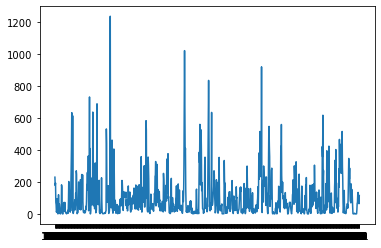

In [52]:
plt.plot(gt.density_matrix.mean(axis=0))
plt.show()

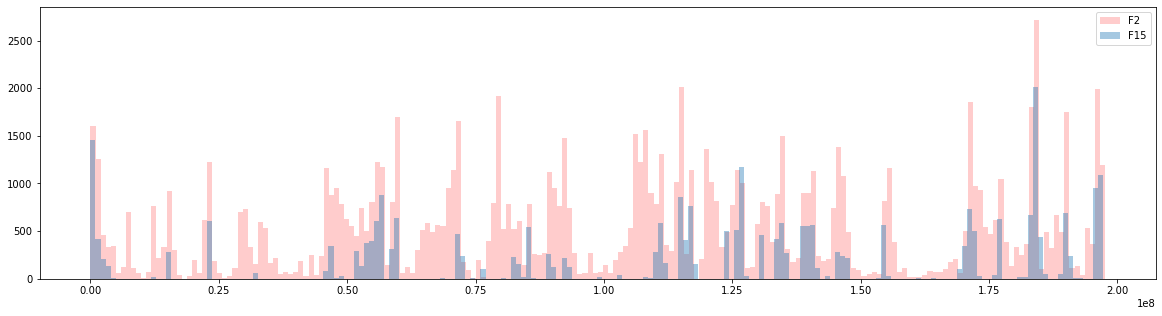

In [53]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.hist(all_df_f2["start"], bins=200, color="Red", alpha=0.2, label="F2")
ax.hist(df_big["start"], bins=200, alpha=0.4, label="F15")
plt.legend()
plt.show()

In [54]:
mean_density =  gt.density_matrix.mean(axis=0)

In [55]:
mean_chr1 = mean_density[[i for i in mean_density.index if i.startswith("1-")]]

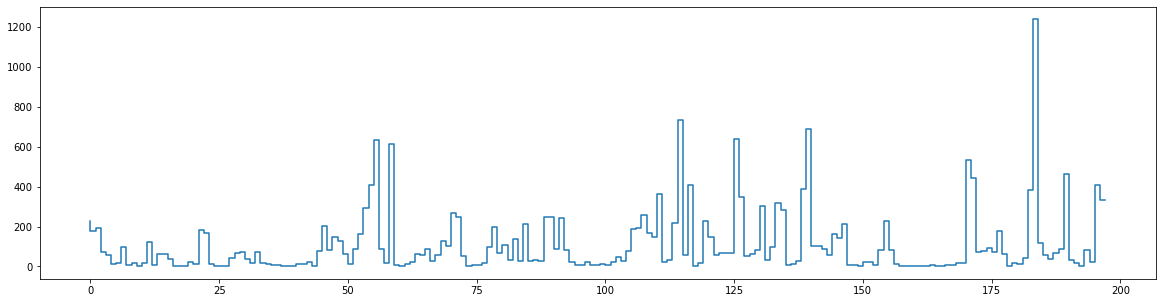

In [56]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.step(range(len(mean_chr1)), mean_chr1)
plt.show()

In [57]:
len(mean_chr1)

198

In [58]:
df_big_sorted = df_big.sort_values(by="start", ascending=True)

In [59]:
j = 0
d = {i:0for i in range(198)}
for i,k in df_big_sorted.iterrows():
    
    if (k["start"]/1000000) > j:
        #print("position", k["pos"]/1000000)
        #print("position", k["pos"]//1000000)
        j = k["start"]//1000000
        #print("is in", j)
        d[j] = d[j]+1

In [60]:
rec_breaks_per_bin = [k for i, k in d.items()]


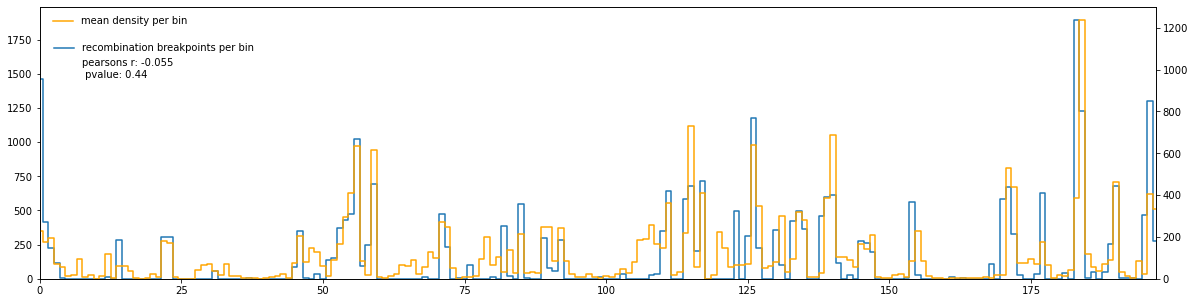

In [61]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.step(range(len(mean_chr1)), rec_breaks_per_bin, where="mid",label="recombination breakpoints per bin")
x = np.arange(len(mean_chr1))
#ax.fill_between(x, 0, rec_breaks_per_bin, alpha=0.5, label="recombination breakpoints per bin")
ax2 = ax.twinx()
ax2.step(range(len(mean_chr1)), mean_chr1, where="mid", color="orange",label="mean density per bin")


#ax2.fill_between(x, 0, mean_chr1,color="orange", alpha=0.5, label="mean density per bin")
#ax.fill_between(x, 0, mean_chr1,color="orange", alpha=0.5)
ax.plot([200],[1200],color="white", label="pearsons r: -0.055 \n pvalue: 0.44")
ax.legend(bbox_to_anchor = [0.2, 0.9],frameon=False)
ax2.legend(bbox_to_anchor = [0.14, 1],frameon=False)



ax.set_xlim(0,197)
ax.set_ylim(0,)
ax2.set_ylim(0,)


plt.show()

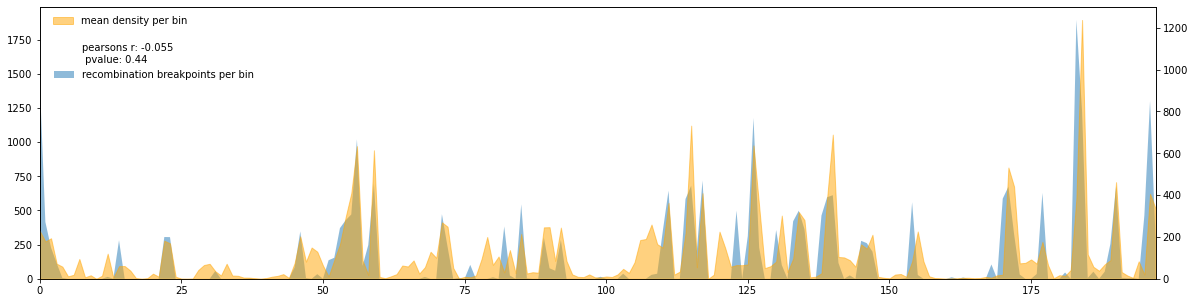

In [62]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
#ax.step(range(len(mean_chr1)), rec_breaks_per_bin, where="mid")
x = np.arange(len(mean_chr1))
ax.fill_between(x, 0, rec_breaks_per_bin, alpha=0.5, label="recombination breakpoints per bin")
ax2 = ax.twinx()

ax2.fill_between(x, 0, mean_chr1,color="orange", alpha=0.5, label="mean density per bin")
#ax.fill_between(x, 0, mean_chr1,color="orange", alpha=0.5)
ax.plot([200],[1200],color="white", label="pearsons r: -0.055 \n pvalue: 0.44")
ax.legend(bbox_to_anchor = [0.2, 0.9],frameon=False)
ax2.legend(bbox_to_anchor = [0.14, 1],frameon=False)



ax.set_xlim(0,197)
ax.set_ylim(0,)
ax2.set_ylim(0,)


plt.show()

In [63]:
from scipy.stats.stats import pearsonr  

In [64]:
pearsonr(mean_chr1, rec_breaks_per_bin)

(0.7270838818074177, 7.573831266572136e-34)

In [65]:
j = 0
d = {i:0for i in range(198)}
for i,k in df_big_sorted.iterrows():
    
    if (k["mean"]/1000000) > j:
        #print("position", k["pos"]/1000000)
        #print("position", k["pos"]//1000000)
        j = k["mean"]//1000000
        #print("is in", j)
        d[j] = d[j]+1

In [66]:
rec_breaks_per_bin_mean = [k for i, k in d.items()]


In [67]:
GG_marker_pos = [8.883994,
 8.912936,
 8.959004,
 22.507858,
 22.867275,
 28.519753,
 28.742506,
 31.407322,
 31.5205,
 33.109344,
 33.267647,
 36.168263,
 53.135388,
 53.885881,
 56.23131,
 88.288637,
 89.793898,
 110.534187,
 114.118715,
 114.329382,
 114.899198,
 115.10253,
 119.465676,
 126.167075,
 134.143579,
 134.365873,
 138.289666,
 139.032578,
 139.80074,
 142.84801,
 142.97431,
 143.003837,
 143.317865,
 143.407863,
 145.579464,
 145.647342,
 150.929579,
 151.443877,
 153.645775,
 153.846618,
 154.088899,
 154.915579,
 168.271271,
 169.935296,
 170.029167,
 170.439956,
 171.185457,
 171.329418,
 171.549616,
 171.601631,
 172.867207,
 173.815317,
 174.118054,
 174.515225,
 174.860183,
 175.102555,
 176.059576,
 176.557071,
 176.839439,
 176.999778,
 177.369732,
 182.553715,
 182.715674,
 182.753191,
 182.857245,
 188.85904,
 189.119224,
 189.536264,
 197.269868,
 197.121948,
 196.781584]

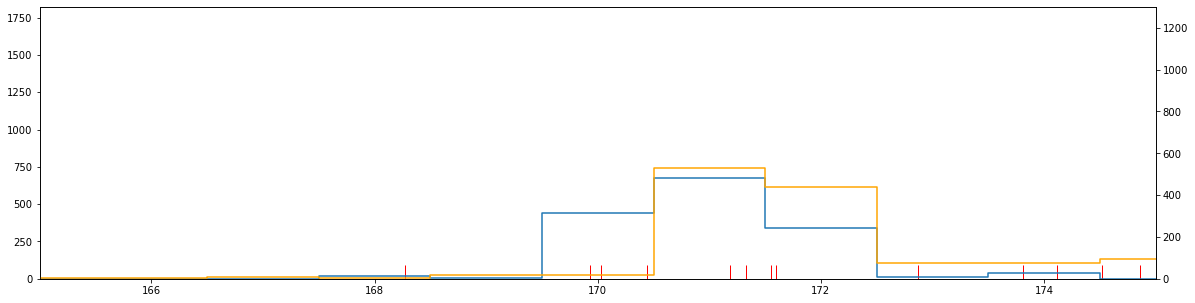

In [68]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.step(range(len(mean_chr1)), rec_breaks_per_bin_mean, where="mid",label="recombination breakpoints per bin MID")
x = np.arange(len(mean_chr1))
#ax.fill_between(x, 0, rec_breaks_per_bin, alpha=0.5, label="recombination breakpoints per bin")
ax2 = ax.twinx()
ax2.step(range(len(mean_chr1)), mean_chr1, where="mid", color="orange",label="mean density per bin")


#ax2.fill_between(x, 0, mean_chr1,color="orange", alpha=0.5, label="mean density per bin")
#ax.fill_between(x, 0, mean_chr1,color="orange", alpha=0.5)
ax.plot([200],[1200],color="white", label="pearsons r: -0.028 \n pvalue: 0.7")
#ax.legend(bbox_to_anchor = [0.00449, 0.9],frameon=False)
#ax2.legend(bbox_to_anchor = [0.14, 1],frameon=False)
sns.rugplot(GG_marker_pos, color="red", ax=ax)

ax.set_xlim(165,175)
#ax.set_xlim(182,185)
ax.set_ylim(0,)
ax2.set_ylim(0,)



plt.show()

In [69]:
pearsonr(mean_chr1, rec_breaks_per_bin_mean)

(0.7600482997667384, 1.5359342458198298e-38)

In [70]:
from collections import Counter

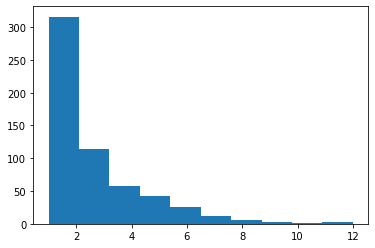

In [71]:
plt.hist(Counter(df_big.loc[(df_big["mean"]>125e6)&(df_big["mean"]<128e6)]["genotype"]).values())
plt.show()

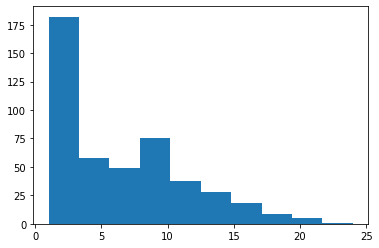

In [72]:
plt.hist(Counter(df_big.loc[(df_big["mean"]>183e6)&(df_big["mean"]<185e6)]["genotype"]).values())
plt.show()

In [73]:
len(Counter(df_big.loc[(df_big["mean"]>183e6)&(df_big["mean"]<185e6)]["genotype"]))

463

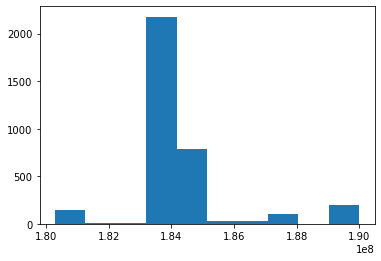

In [74]:
plt.hist(df_big.loc[(df_big["mean"]>180e6)&(df_big["mean"]<190e6)]["mean"])
plt.show()

In [75]:
mean_density.loc[["1-183","1-184", "1-185"]]

1-183    84.807327
1-184    21.095518
1-185     9.406608
dtype: float64